https://www.dataquest.io/mission/114/challenge-cleaning-data

In [2]:
import pandas as pd

avengers = pd.read_csv("avengers.csv")
print avengers.head(5)






                                                 URL  \
0      http://marvel.wikia.com/Henry_Pym_(Earth-616)   
1  http://marvel.wikia.com/Janet_van_Dyne_(Earth-...   
2  http://marvel.wikia.com/Anthony_Stark_(Earth-616)   
3  http://marvel.wikia.com/Robert_Bruce_Banner_(E...   
4   http://marvel.wikia.com/Thor_Odinson_(Earth-616)   

                    Name/Alias  Appearances Current?  Gender  \
0    Henry Jonathan "Hank" Pym         1269      YES    MALE   
1               Janet van Dyne         1165      YES  FEMALE   
2  Anthony Edward "Tony" Stark         3068      YES    MALE   
3          Robert Bruce Banner         2089      YES    MALE   
4                 Thor Odinson         2402      YES    MALE   

  Probationary Introl Full/Reserve Avengers Intro  Year  Years since joining  \
0                 NaN                      Sep-63  1963                   52   
1                 NaN                      Sep-63  1963                   52   
2                 NaN                 

Let's look at when superhereos were introduced

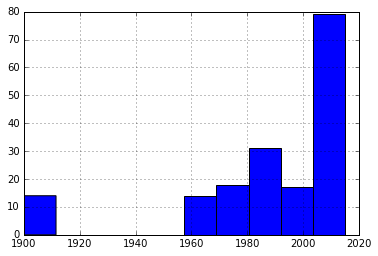

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
true_avengers = pd.DataFrame()

avengers['Year'].hist()

The Avengers weren't introduced until the 60's, so let's remove those avengers with introductions ~1900

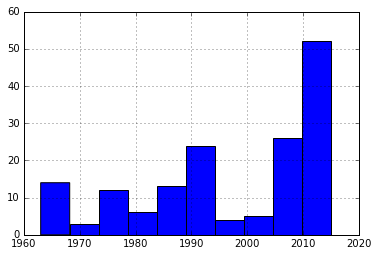

In [4]:
true_avengers = avengers[avengers['Year']>= 1960]
true_avengers['Year'].hist()

"We are interested in the number of total deaths each character experienced and we'd like a field containing that distilled information. Right now, there are 5 fields (Death1 to Death5) that each contain a binary value representing if a superhero experienced that death or not. For example, a superhero can experience Death1, then Death2, etc. until they were no longer brought back to life by the writers."

So let's put total deaths in a new column.

In [5]:
def num_deaths(row):
    sum = 0 
    columns = ['Death1','Death2','Death3','Death4','Death5']
    for c in columns:
        if row[c]=="YES":
            sum = sum +1
    return sum
        
true_avengers['Deaths'] = true_avengers.apply(num_deaths,axis=1)


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Let's make sure the 'Years since joining' field and the 'Year' column--which gives the first year the character appeared--are accurate for the "present" year. For "present year" we'll assume it's 2015 since this is when the data set was collected.

In [7]:
joined_accuracy_count = sum((true_avengers["Years since joining"]+true_avengers["Year"])==2015)
print joined_accuracy_count

159
